# 레드와인 품질 데이터

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# data import
df_wine = pd.read_csv('./winequality-red.csv')

## 훈련 테스트 셋 나누기

In [39]:
# ttsplit
X = df_wine.drop('quality', axis=1).to_numpy()
y = df_wine['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## 특성 살펴보기

### 품질분포, 히스토그램

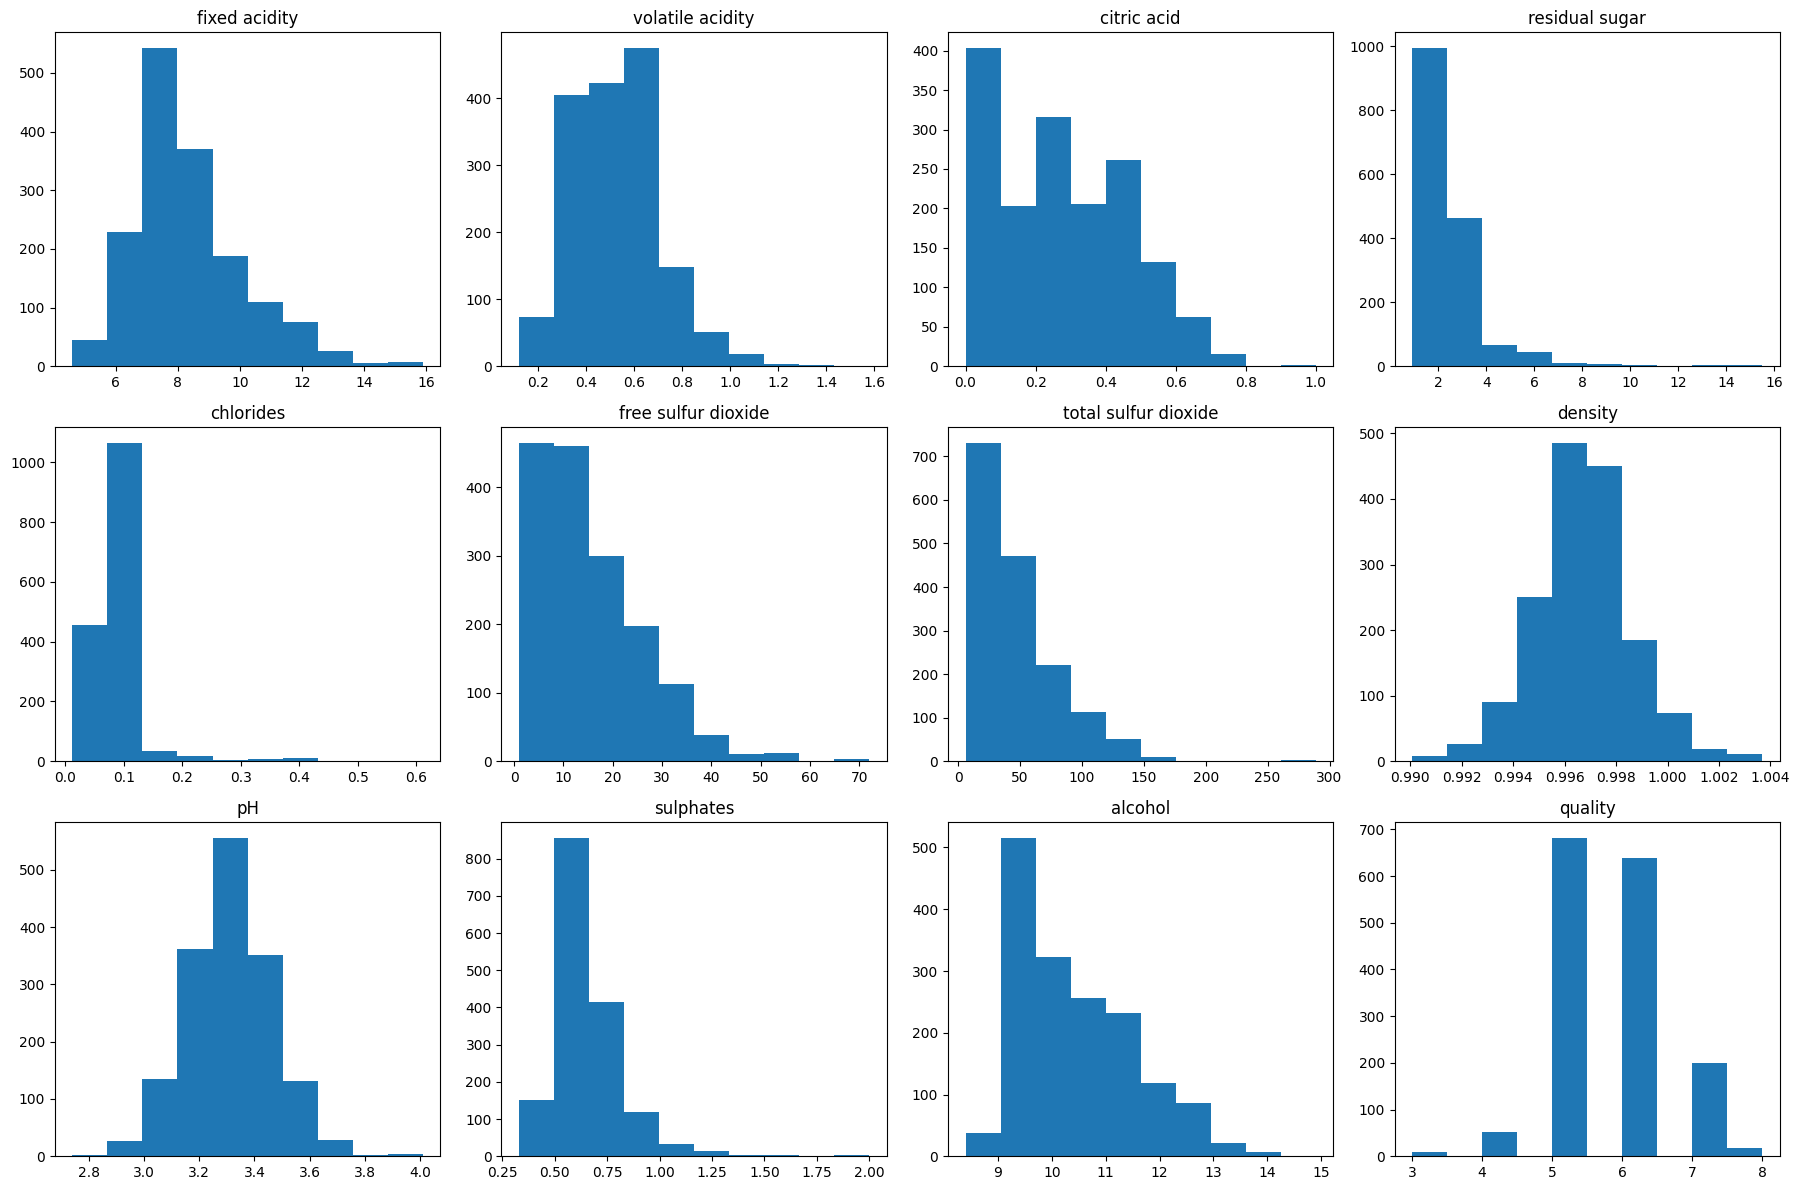

In [40]:
feature = df_wine.columns

fig, axes = plt.subplots(3, 4, figsize = (18, 12))
axes = axes.ravel()

for idx, column in enumerate(feature):
    axes[idx].hist(df_wine[column])
    axes[idx].set_title(column)
    
plt.tight_layout()
plt.show()

### 품질과의 상관관계(히트맵)

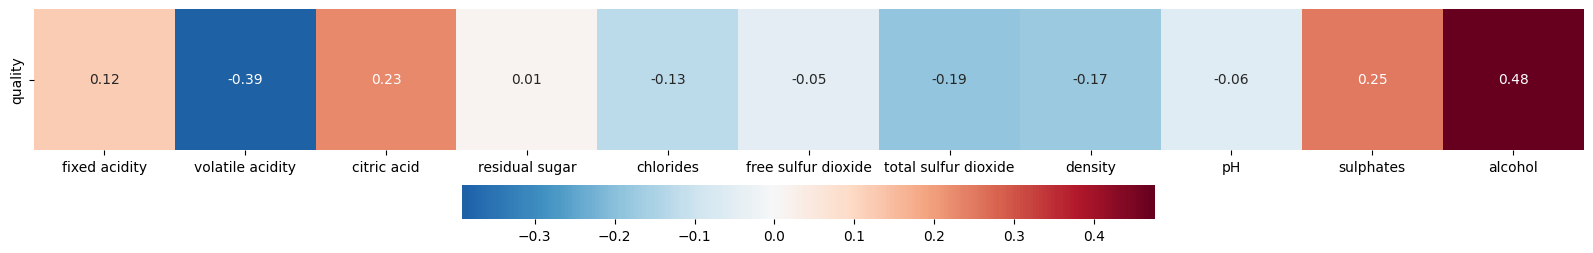

In [41]:
plt.figure(figsize=(20,3))
sns.heatmap(
    df_wine.corr()[['quality']].drop('quality').T,
    annot=True,
    center=0,
    square=True,
    fmt='.2f',
    cmap='RdBu_r',
    cbar_kws={'orientation': 'horizontal'},
)
plt.show()

## KNN 회귀

=== KNN Regressor ===
Train score: 0.402327506464778
Test score : 0.3448587668573292
(13, 0.3448587668573292)


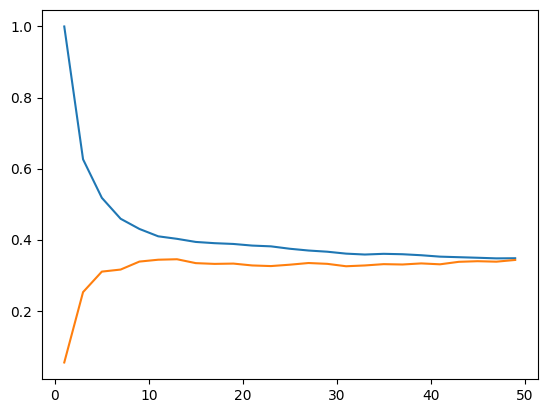

In [74]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=13)
knr.fit(X_train, y_train)
print('=== KNN Regressor ===')
print('Train score:', knr.score(X_train, y_train))
print('Test score :', knr.score(X_test, y_test))

n_neighbors = range(1, 50, 2)
train_score = []
test_score = []
knr_score = []

for n in n_neighbors:
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    train_score.append(knr.score(X_train, y_train))
    test_score.append(knr.score(X_test, y_test))
    knr_score.append((n, knr.score(X_test, y_test)))

print(max(knr_score, key=lambda x:x[1]))

plt.plot(n_neighbors, train_score)
plt.plot(n_neighbors, test_score)
plt.show()

## 선형회귀

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr_p = LinearRegression()
lr_p.fit(X_train_poly, y_train)
print('=== Linear Regression(Polynomial) ===')
print('Train score:', lr_p.score(X_train_poly, y_train))
print('Test score :', lr_p.score(X_test_poly, y_test))

=== Linear Regression(Polynomial) ===
Train score: 0.43885803782246513
Test score : 0.3744541652896377


### Ridge/Lasso 규제

=== Ridge ===
Train score: 0.42575149156007674
Test score : 0.3928954680982364
(100, 0.3928954680982364)


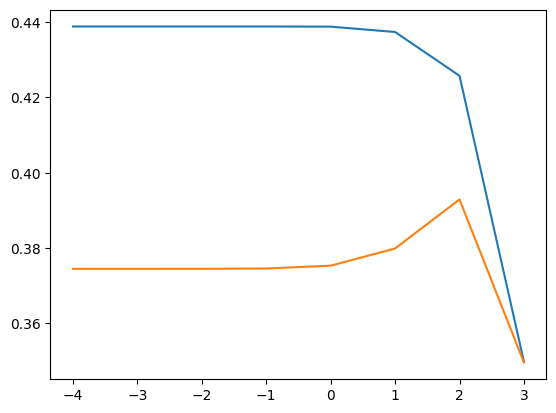

In [60]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(X_train_poly, y_train)
print('=== Ridge ===')
print('Train score:',ridge.score(X_train_poly, y_train))
print('Test score :',ridge.score(X_test_poly, y_test))

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []
ridge_score = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    train_score.append(ridge.score(X_train_poly, y_train))
    test_score.append(ridge.score(X_test_poly, y_test))
    ridge_score.append((alpha, ridge.score(X_test_poly, y_test)))

print(max(ridge_score, key=lambda x:x[1]))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

=== Lasso ===
Train score: 0.41044928482141396
Test score : 0.3904323830085157
(0.01, 0.3904323830085157)


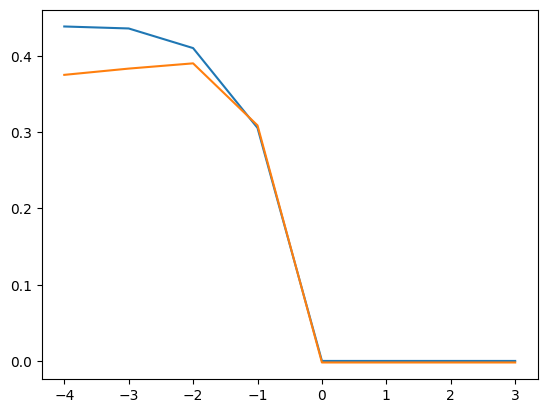

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)
print('=== Lasso ===')
print('Train score:',lasso.score(X_train_poly, y_train))
print('Test score :',lasso.score(X_test_poly, y_test))

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []
lasso_score = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly, y_train)
    train_score.append(lasso.score(X_train_poly, y_train))
    test_score.append(lasso.score(X_test_poly, y_test))
    lasso_score.append((alpha, lasso.score(X_test_poly, y_test)))

print(max(lasso_score, key=lambda x:x[1]))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## KNN 분류

=== KNN Classifier ===
Train score: 0.6638865721434529
Test score : 0.585
(9, 0.585)


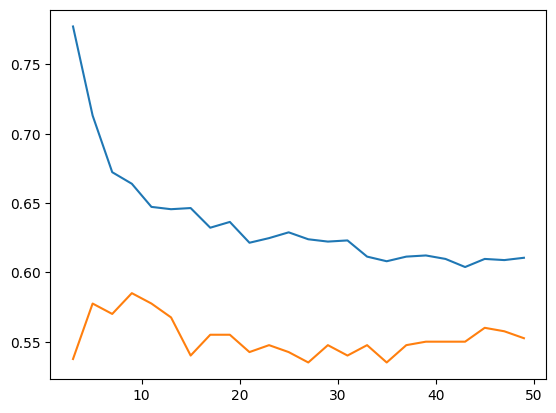

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(X_train, y_train)
print('=== KNN Classifier ===')
print('Train score:', knc.score(X_train, y_train))
print('Test score :', knc.score(X_test, y_test))

n_neighbors = range(3, 50, 2)
train_score = []
test_score = []
knc_score = []

for n in n_neighbors:
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    train_score.append(knc.score(X_train, y_train))
    test_score.append(knc.score(X_test, y_test))
    knc_score.append((n, knc.score(X_test, y_test)))
    
print(max(knc_score, key=lambda x:x[1]))

plt.plot(n_neighbors, train_score)
plt.plot(n_neighbors, test_score)
plt.show()

## 로지스틱 회귀 분류

=== Logistic Regression ===
Train score: 0.6138448707256047
Test score : 0.5875
(1, 0.5875)


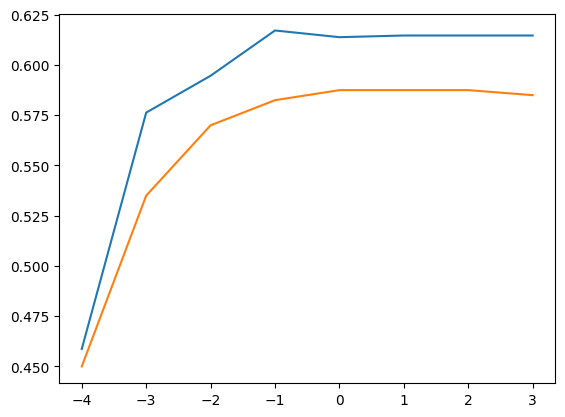

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, max_iter=10000)
lr.fit(X_train, y_train)
print('=== Logistic Regression ===')
print('Train score:',lr.score(X_train, y_train))
print('Test score :',lr.score(X_test, y_test))

C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score = []
test_score = []
lr_score = []

for C in C_list:
    lr = LogisticRegression(C=C)
    lr.fit(X_train, y_train)
    train_score.append(lr.score(X_train, y_train))
    test_score.append(lr.score(X_test, y_test))
    lr_score.append((C, lr.score(X_test, y_test)))
    
print(max(lr_score, key=lambda x:x[1]))

plt.plot(np.log10(C_list), train_score)
plt.plot(np.log10(C_list), test_score)
plt.show()

### 품질 라벨링

In [48]:
df_wine_copy = df_wine.copy()
df_wine_copy.loc[df_wine_copy['quality'] >= 7, 'quality_label'] = 'High'
df_wine_copy.loc[(7 > df_wine_copy['quality']) & (df_wine_copy['quality'] >= 5), 'quality_label'] = 'Medium'
df_wine_copy.loc[5 > df_wine_copy['quality'], 'quality_label'] = 'Low'

X = df_wine_copy.drop(['quality', 'quality_label'], axis=1).to_numpy()
y = df_wine_copy['quality_label'].to_numpy()

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, random_state=42)

=== Logistic Regression ===
Train score: 0.8482068390325271
Test score : 0.85
(100, 0.85)


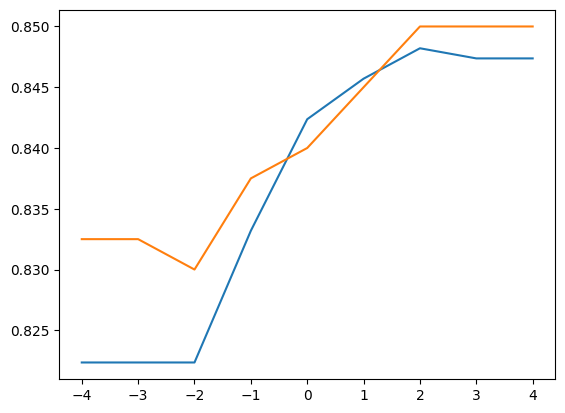

In [70]:
from sklearn.linear_model import LogisticRegression

lr_l = LogisticRegression(C=100, max_iter=10000)
lr_l.fit(X_train_l, y_train_l)
print('=== Logistic Regression ===')
print('Train score:', lr_l.score(X_train_l, y_train_l))
print('Test score :', lr_l.score(X_test_l, y_test_l))

C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_score = []
test_score = []
lr_l_score = []

for C in C_list:
    lr_l = LogisticRegression(C=C, max_iter=10000)
    lr_l.fit(X_train_l, y_train_l)
    train_score.append(lr_l.score(X_train_l, y_train_l))
    test_score.append(lr_l.score(X_test_l, y_test_l))
    lr_l_score.append((C, lr_l.score(X_test_l, y_test_l)))
    
print(max(lr_l_score, key=lambda x:x[1]))

plt.plot(np.log10(C_list), train_score)
plt.plot(np.log10(C_list), test_score)
plt.show()